KNN Cancer Classifier

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

1- Dataset

In [2]:
## 1- Load the dataset
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-02-24 12:08:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

100%[======================================>] 20,675      --.-K/s   in 0.07s   

2020-02-24 12:08:39 (272 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head(7)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [4]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Let's see how many of each class is in the dataset

In [5]:
cell_df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

458 Benign samples
241 Malignant samples

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d99068cc0>]],
      dtype=object)

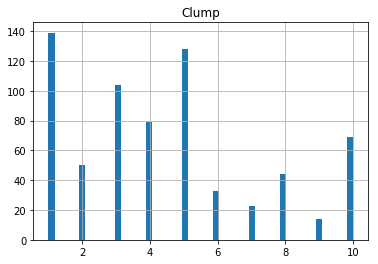

In [6]:
cell_df.hist(column='Clump', bins=50)

Lets define feature sets, X:

In [7]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [8]:
X = cell_df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']] .values  #.astype(float)
X[0:5]


array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1]])

In [9]:
y = cell_df['Class'].values
y[0:5]

array([2, 2, 2, 2, 2])

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:


In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.12366418,  0.19790469, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 , -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185,  0.26278299,  0.75803177,
         1.69516613,  1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 , -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [-0.09745928,  0.55267873,  1.58320366,  1.6021918 , -0.63936553,
        -0.10545357,  0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.09625642, -0.15686934, -0.70221201, -0.74177362,  0.05933312,
        -0.5556085 , -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

Train/Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 10) (546,)
Test set: (137, 10) (137,)


2- Model

Classification

K nearest neighbor (KNN)

Import library


In [12]:
from sklearn.neighbors import KNeighborsClassifier

Training

Lets start the algorithm with k=3 :

In [13]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Predicting

We can use the model to predict the test set:


In [14]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

3- Evaluation

Accuracy evaluation

A- first using jaccard_similarity_score function for k=3 :

In [15]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9708029197080292

B- Using f1_score from sklearn library for k = 3 :

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9710669934861801

Let's choose another value for k = 5

In [21]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

C- Jaccard index for k =5 

In [23]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9781021897810219

D- Using f1_score from sklearn library for k = 5:

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9782552410493706

Let's choose another value for k = 9

In [25]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [26]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

E- Jaccard index for k = 9

In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9708029197080292

F- F1-score for k =9

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9710669934861801

Conclusion
Therefore the best accuracy of this model accross the different values of k is when k = 5
Where Jaccard =0.9781021897810219
        f1_score = 0.9782552410493706

In [32]:
log_loss(y_test, yhat)
   

NameError: name 'log_loss' is not defined